In [96]:
import pandas as pd
#导入逻辑回归模型
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#引入交叉验证的包
df=pd.read_csv('/Users/alan/Downloads/github/sklearn/user_limit_train.csv')
# df.head()

In [97]:
# df.describe()

In [98]:
# 是否进件
df['is_submit'].unique()

array([0, 1])

In [99]:
df['is_submit'].value_counts()

0    88557
1    11443
Name: is_submit, dtype: int64

In [100]:
df.columns

Index(['est_id', 'passport_id', 'est_tm', 'est_is_succ', 'est_gps_province_cd',
       'est_gps_city_cd', 'est_quota', 'est_period', 'est_system',
       'bus_type_cd', 'est_origin', 'est_platform', 'first_audit_is_pass',
       'subm_status', 'submit_first_audit_tm', 'info_modify_tm', 'apply_amt',
       'apply_limit_dt', 'credit_score', 'subm_apply_is_pass',
       'rule_engine_process_result', 'first_audit_limit_dt',
       'first_audit_rate', 'first_audit_amt', 'is_submit'],
      dtype='object')

In [101]:
# 选取特征变量  'est_tm','submit_first_audit_tm','est_gps_province_cd','est_gps_city_cd', 
# 预估时间、预估是否成功、预估省份、预估城市、预估额度、预估期限、预估手机系统、预估业务类型、预估来源、预估渠道、初审是否通过、初审状态、
# 初审时间、申请金额、申请期限、信用分数、初审是否通过、规则引擎是否通过、提交初审期限、初审费率、初审金额
predictors=['est_is_succ', 'est_quota', 'est_period', 'est_system',
       'bus_type_cd', 'est_origin', 'est_platform', 'first_audit_is_pass','subm_status',  'apply_amt',
       'apply_limit_dt', 'credit_score', 'subm_apply_is_pass',
       'rule_engine_process_result', 'first_audit_limit_dt',
       'first_audit_rate', 'first_audit_amt']

In [102]:
predictors

['est_is_succ',
 'est_quota',
 'est_period',
 'est_system',
 'bus_type_cd',
 'est_origin',
 'est_platform',
 'first_audit_is_pass',
 'subm_status',
 'apply_amt',
 'apply_limit_dt',
 'credit_score',
 'subm_apply_is_pass',
 'rule_engine_process_result',
 'first_audit_limit_dt',
 'first_audit_rate',
 'first_audit_amt']

In [103]:
# 预测用户是否可以进件
# df[predictors]

In [104]:
# df.dropna()

In [105]:
# 训练数据
train_data=df[predictors]
target_data=df['is_submit']

/Users/alan/anaconda/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [11 12] are constant.
  UserWarning)
/Users/alan/anaconda/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/alan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10


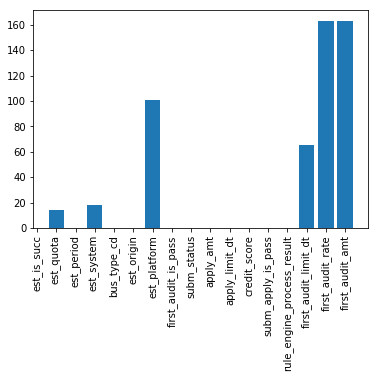

In [106]:
# 特征选择：相关系数
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
selector = SelectKBest(f_classif, k=5)
# 第一个参数：所有特征数据 第二个参数：真实数据的标签
selector.fit(train_data,target_data)
# selector.pvalues_

# 获取每个要素的原始p值，并将其从p值转换为分数
scores = -np.log10(selector.pvalues_)

# 绘制分数
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [110]:
# 特征选择最终版
predictors=['est_quota','est_system','est_platform','first_audit_limit_dt','first_audit_rate', 'first_audit_amt']

In [111]:
# 训练数据特征选择
train_data=df[predictors]
target_data=df['is_submit']

In [112]:
# 导入各种算法包
from sklearn import tree
from sklearn import ensemble
from sklearn import linear_model
from sklearn import svm

In [113]:
# 1、逻辑回归
lr = linear_model.LogisticRegression()
lr_scores = cross_val_score(lr, train_data,target_data,cv=5)
print("logistic regression accuracy:")
print(lr_scores)
lr_scores.mean()

logistic regression accuracy:
[ 0.88845558  0.88705565  0.888       0.88774439  0.88729436]


0.88770999527527505

In [114]:
# 2、决策树
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=5)
clf_scores = cross_val_score(clf,train_data,target_data, cv=5)
print("decision tree accuracy:")
print(clf_scores)
clf_scores.mean()

decision tree accuracy:
[ 0.92120394  0.92285386  0.9186      0.91829591  0.920046  ]


0.92019994284119977

In [115]:
# 3、随机森林
rfc = ensemble.RandomForestClassifier(criterion='entropy', n_estimators=3, max_features=0.5, min_samples_split=5)
rfc_scores = cross_val_score(rfc,train_data,target_data, cv=5)
print("random forest accuracy:")
print(rfc_scores)
rfc_scores.mean()

random forest accuracy:
[ 0.92140393  0.92150392  0.91935     0.91549577  0.91849592]


0.91924991083844976

In [116]:
# 4、极端随机树
etc = ensemble.ExtraTreesClassifier(criterion='entropy', n_estimators=3, max_features=0.6, min_samples_split=5)
etc_scores = cross_val_score(etc,train_data,target_data, cv=5)
print("extra trees accuracy:")
print(etc_scores)
etc_scores.mean()

extra trees accuracy:
[ 0.92045398  0.92050397  0.9196      0.91644582  0.91839592]


0.91907993883789985

In [117]:
# 5、梯度提升
gbc = ensemble.GradientBoostingClassifier()
gbc_scores = cross_val_score(gbc,train_data,target_data, cv=5)
print("gradient boosting accuracy:")
print(gbc_scores)
gbc_scores.mean()

gradient boosting accuracy:
[ 0.90940453  0.91070446  0.9086      0.90374519  0.90329516]


0.90714986931357466

In [118]:
# 6、SVM支持向量机
svc = svm.SVC()
svc_scores = cross_val_score(svc,train_data,target_data, cv=5)
print("svm classifier accuracy:")
print(svc_scores)
svc_scores.mean()

svm classifier accuracy:
[ 0.92170391  0.92295385  0.91995     0.91829591  0.91909595]


0.92039992734102472

In [119]:
# 7、adboosting
abc=ensemble.AdaBoostClassifier(n_estimators=100) #迭代100次  
abc_scores = cross_val_score(abc,train_data,target_data, cv=5)
print ('AdaBoostingClassfier accuracy:')
print (abc_scores)
abc_scores.mean()

AdaBoostingClassfier accuracy:
[ 0.89980501  0.89860507  0.89625     0.89169458  0.8939447 ]


0.89605987229202455

In [120]:
# import pickle
# bin_file = open(r'/Users/alan/Downloads/github/sklearn/gbc.model', 'wb')
# pickle.dump(bins, bin_file)
# bin_file.close()
# 由于梯度提升的算法准确率最高，所以我们选择此算法作为我们的训练模型算法
gbc=gbc.fit(train_data,target_data)
#模型持久化
from sklearn.externals import joblib
joblib.dump(gbc, '/Users/alan/Downloads/github/sklearn/gbc.model')

['/Users/alan/Downloads/github/sklearn/gbc.model']

In [121]:
# 使用持久化后的模型进行新数据预测,导入模型
gbc=joblib.load('/Users/alan/Downloads/github/sklearn/gbc.model')

In [122]:
# 导入最新的数据
test_train=pd.read_csv('/Users/alan/Downloads/github/sklearn/test_data.csv')
# test_train
test_data=test_train[predictors]
# test_data

In [123]:
# 预测数据
result=gbc.predict(test_data)
result

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
# 创建新的数据集，只保存主键id和预测结果
prediction_data=pd.DataFrame({'est_id':test_train['est_id'],'is_submit':result})
# prediction_data

In [125]:
# 保存预测结果数据，去除掉索引列
prediction_data.to_csv('/Users/alan/Downloads/github/sklearn/predictions.csv',index=False)

In [126]:
# 用测试集进行模型评估
# 1、准确率：用真实标签和预测标签比较，来得到准确率
from sklearn import metrics
metrics.accuracy_score(test_train['is_submit'], result)

0.96399774985936626

In [127]:
# 2、计算AUC值
# 第一种方法：自定义函数
from sklearn import metrics
def aucfunc(target,predic):
    fpr,tpr,thresholds=metrics.roc_curve(target,predic,pos_label=1)
    return metrics.auc(fpr,tpr)
aucfunc(test_train['is_submit'], result)

0.79436358911904592

In [128]:
# 第二种方法：直接调已有函数
# 第一个参数是真实的标签，第二个参数是预测标签
metrics.roc_auc_score(test_train['is_submit'], result)

0.79436358911904592

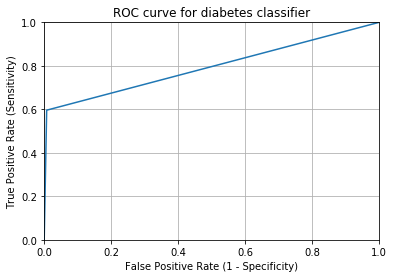

In [129]:
# 画出ROC曲线
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(test_train['is_submit'], result)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [130]:
# 显示真正率(y轴)
tpr

array([ 0.       ,  0.5961039,  1.       ])

In [131]:
# 假正率（X轴）
fpr

array([ 0.        ,  0.00737672,  1.        ])

In [132]:
# 定义接受阈值并打印灵敏度和特异性的函数
def evaluate_threshold(threshold):
    print ('Sensitivity:', tpr[thresholds > threshold][-1])
    print ('Specificity:', 1 - fpr[thresholds > threshold][-1])

evaluate_threshold(0.5)

Sensitivity: 0.596103896104
Specificity: 0.992623282134
